## Titanic 
        1. Plot Survived distribution
        2. plot Pclass distribution
        3. create a new column 'Name_len' which holds string length
        4. plot distribution for Sex
        5. Replace male with 0 and female with 1 for Sex
        6. What is the percentage of male and female?
        7. Plot Siblings/Spouses Aboard distribution
        8. Plot Parents/Children Aboard distribution
        9. Plot Fare distribution
        10. Highlight outliers in Fare if any
        11. What is the ratio of survived and none-servived passengers?
        12. what fraction of Pclass Survived?
        
    - use dataset.csv file for data access: Available at https://drive.google.com/drive/folders/1ASIYcr7Fa7CtDk19U-GcoxK1ghPyqC1t

In [2]:
## import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [4]:
# read data
df = pd.read_csv('dataset.csv')
df.shape

(887, 8)

In [5]:
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [6]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Siblings/Spouses Aboard',
       'Parents/Children Aboard', 'Fare'],
      dtype='object')

In [7]:
df['Survived'].unique()

array([0, 1])

In [9]:
# df[['Survived']].unique() # unique does not work with dataframe object

In [11]:
df['Pclass'].unique()

array([3, 1, 2])

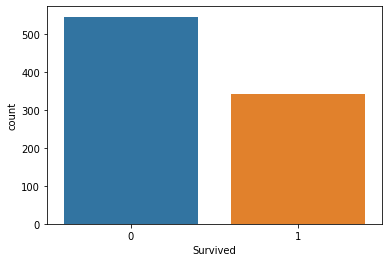

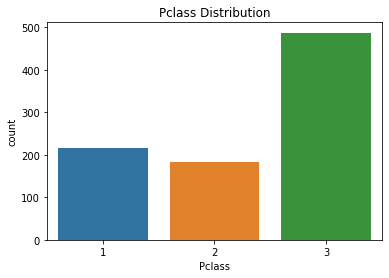

In [23]:
# 1. Plot Survived distribution
sns.countplot(df['Survived'])
plt.show()
# 2. plot Pclass distribution
sns.countplot(df['Pclass'])
plt.title('Pclass Distribution')
plt.show()

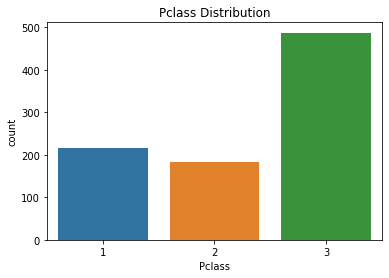

In [24]:
# 2. plot Pclass distribution
sns.countplot(df['Pclass'])
plt.title('Pclass Distribution')
plt.show()

In [17]:
print(df[df.Pclass==2].shape)
print(df[df.Pclass==3].shape)
print(df[df.Pclass==1].shape)

(184, 8)
(487, 8)
(216, 8)


In [28]:
# 3. create a new column 'Name_len' which holds string length
df['Name_len'] = df['Name'].apply(lambda x: len(x)-len(' '))
df.head(2)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Name_len
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500,22
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833,50


In [32]:
## insert a new row to the existing dataframe
df = df.append({'Survived':0,'Pclass':6,'Name':'ABC'},ignore_index=True)
## index 887 corresponds to the new details added to the dataframe

In [33]:
df.tail()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Name_len
883,1,1,Miss. Margaret Edith Graham,female,19.0,0.0,0.0,30.00,27.0
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1.0,2.0,23.45,30.0
885,1,1,Mr. Karl Howell Behr,male,26.0,0.0,0.0,30.00,20.0
886,0,3,Mr. Patrick Dooley,male,32.0,0.0,0.0,7.75,18.0
887,0,6,ABC,NaN,NaN,NaN,NaN,NaN,NaN


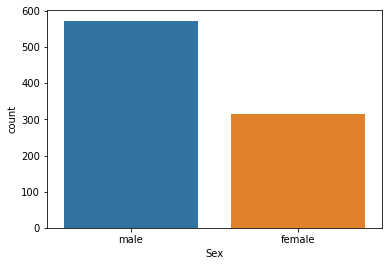

In [34]:
# 4. plot distribution for Sex
sns.countplot(df['Sex'])

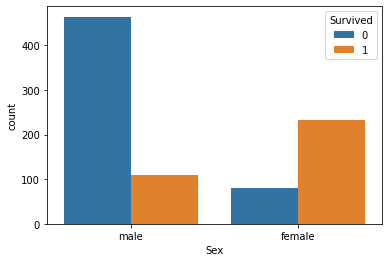

In [38]:
sns.countplot(df['Sex'], hue = df['Survived'])

<Figure size 504x720 with 0 Axes>

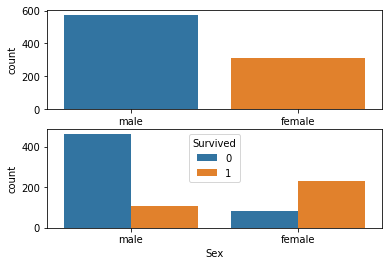

In [40]:
plt.figure(figsize=(7,10))
fig, ax = plt.subplots(2,1)
sns.countplot(df['Sex'],ax= ax[0])
sns.countplot(df['Sex'],hue = df['Survived'],ax= ax[1])

In [45]:
# 5. Replace male with 0 and female with 1 for Sex
df['Sex_binary'] = df['Sex'].map({'female':1,'male':0})
# df['Sex_binary'] = df['Sex_binary'].astype('int') # type casting
df.head(3)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Name_len,Sex_binary
0,0,3,Mr. Owen Harris Braund,male,22.0,1.0,0.0,7.2500,22.0,0.0
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1.0,0.0,71.2833,50.0,1.0
2,1,3,Miss. Laina Heikkinen,female,26.0,0.0,0.0,7.9250,21.0,1.0


In [50]:
# 6. What is the percentage of male and female?
# x = (len(df[df.Sex=='male'])/len(df)*100 )
# round(x,2)
print('Male: {} %'.format(round( len(df[df.Sex=='male'])/len(df)*100 ),5))
print('Female: {} %'.format(round( len(df[df.Sex=='female'])/len(df)*100 ),5))

Male: 65 %
Female: 35 %


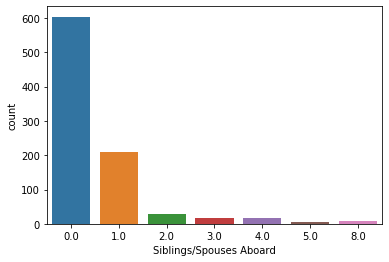

In [53]:
# 7. Plot Siblings/Spouses Aboard distribution
sns.countplot(df['Siblings/Spouses Aboard'])

In [55]:
### finding count of nans in the data
df.isnull().sum()

Survived                   0
Pclass                     0
Name                       0
Sex                        1
Age                        1
Siblings/Spouses Aboard    1
Parents/Children Aboard    1
Fare                       1
Name_len                   1
Sex_binary                 1
dtype: int64

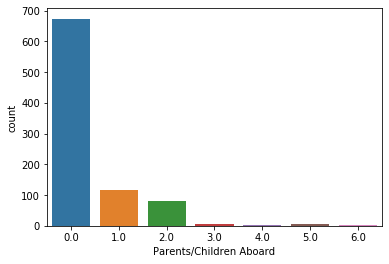

In [57]:
# 8. Plot Parents/Children Aboard distribution
sns.countplot(df['Parents/Children Aboard'])

In [58]:
df[df['Parents/Children Aboard']==6].shape[0]

1

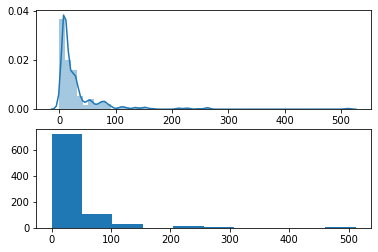

In [71]:
# 9. Plot Fare distribution
df.fillna(0, inplace = True) ##
fig, ax = plt.subplots(2,1)
sns.distplot(df['Fare'], ax= ax[0])
ax[1].hist(df['Fare'])
plt.show()

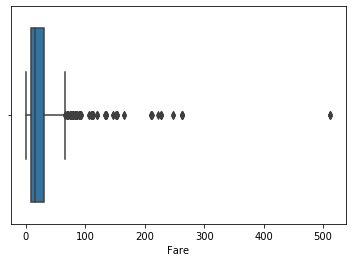

In [72]:
# 10. Highlight outliers in Fare if any
sns.boxplot('Fare', data = df)
plt.show()

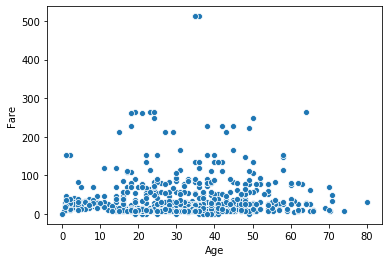

In [76]:
sns.scatterplot('Age', 'Fare', data = df)

In [77]:
# 11. What is the ratio of survived and none-servived passengers?
df[df.Survived==1].shape[0]/df[df.Survived==0].shape[0]

0.6263736263736264

In [79]:
# 12. what fraction of Pclass Survived?
df[df.Survived==1].shape[0]/df.shape[0]

0.38513513513513514

###  Load practice.csv file as a data-frame and perform following operations on the data-frame (try to use pandas methods)
        1.	Display all columns
        2.	create numerical and categorical columns list
        3.	display size of the data-frame
        4.	rename column MSSubClass -> SubClass, MSZoning -> Zones
        5.	display distinct values for Zoning, LotShape, LotConfig
        6.	display count of distinct values for Zoning, LotShape, LotConfig
        7.	max, min of column YearBuilt
        8.	create a new column “year_diff’. This will be holding difference of current year and YearBuilt
        9.	display distinct MSZoning for each OverallQual
        10.	what is maximum LotArea where  BsmtExposure = Mn?
        11.	Sort dataframe based on following columns and orders: MSSubClass; ascending, YearBuilt; descending
        12.	What is average OverallQual.
        13.	Group by YearBuilt and find maximum OverallQal
        14.	Load the data_1.csv again with MSSubClass as new index
        15.	Convert LotArea as numpy array
        16.	In column MasVnrArea replace 0 with -1
        17.	Check if there is/are any Null values (NaN) in the data given
        18.	Display percentage of missing values in each column if any
        19.	Select records where LotConfig is Inside
        20.	Make a new dataframe with only numeric columns
        21.	Make a new dataframe with only factorial/string columns
        22.	Drop column ExterQual
        23.	Group data on LotShape and find average LotArea

In [83]:
## load data 
df = pd.read_csv('practice.csv')
df.shape

(30, 11)

In [84]:
df.head()

,MSSubClass,MSZoning,LotArea,LotShape,LotConfig,LandSlope,OverallQual,YearBuilt,MasVnrArea,ExterQual,BsmtExposure
0,60,RL,8450,Reg,Inside,Gtl,7,2003,196,Gd,No
1,20,RL,9600,Reg,FR2,Gtl,6,1976,0,TA,Gd
2,60,RL,11250,IR1,Inside,Gtl,7,2001,162,Gd,Mn
3,70,RL,9550,IR1,Corner,Gtl,7,1915,0,TA,No
4,60,RL,14260,IR1,FR2,Gtl,8,2000,350,Gd,Av


In [ ]:
# 1.    Display all columns # df.columns
# 2.    create numerical and categorical columns list
# 3.    display size of the data-frame # df.shape
# 4.    rename column MSSubClass -> SubClass, MSZoning -> Zones
# 5.    display distinct values for Zoning, LotShape, LotConfig # df['col'].unique()
# 6.    display count of distinct values for Zoning, LotShape, LotConfig # df['col'].nunique()
# 7.    max, min of column YearBuilt
# 8.    create a new column “year_diff’. This will be holding difference of current year and YearBuilt
# 9.    display distinct MSZoning for each OverallQual
# 10.    what is maximum LotArea where  BsmtExposure = Mn?
# 11.    Sort dataframe based on following columns and orders: MSSubClass; ascending, YearBuilt; descending
# 12.    What is average OverallQual.
# 13.    Group by YearBuilt and find maximum OverallQal
# 14.    Load the data_1.csv again with MSSubClass as new index
# 15.    Convert LotArea as numpy array
# 16.    In column MasVnrArea replace 0 with -1
# 17.    Check if there is/are any Null values (NaN) in the data given
# 18.    Display percentage of missing values in each column if any
# 19.    Select records where LotConfig is Inside
# 20.    Make a new dataframe with only numeric columns
# 21.    Make a new dataframe with only factorial/string columns
# 22.    Drop column ExterQual
# 23.    Group data on LotShape and find average LotArea

In [87]:
## 2.
numerical_features  = df.select_dtypes(include=[np.number]).columns
print(numerical_features)
categorical_features = df.select_dtypes(include=[np.object]).columns
print(categorical_features)

Index(['MSSubClass', 'LotArea', 'OverallQual', 'YearBuilt', 'MasVnrArea'], dtype='object')
Index(['MSZoning', 'LotShape', 'LotConfig', 'LandSlope', 'ExterQual',
       'BsmtExposure'],
      dtype='object')


In [86]:
df.head(2)

,MSSubClass,MSZoning,LotArea,LotShape,LotConfig,LandSlope,OverallQual,YearBuilt,MasVnrArea,ExterQual,BsmtExposure
0,60,RL,8450,Reg,Inside,Gtl,7,2003,196,Gd,No
1,20,RL,9600,Reg,FR2,Gtl,6,1976,0,TA,Gd


In [88]:
# 4.    rename column MSSubClass -> SubClass, MSZoning -> Zones
df.rename(columns = {'MSSubClass':'SubClass','MSZoning':'Zones'}, inplace = True)
df.head(3)

,SubClass,Zones,LotArea,LotShape,LotConfig,LandSlope,OverallQual,YearBuilt,MasVnrArea,ExterQual,BsmtExposure
0,60,RL,8450,Reg,Inside,Gtl,7,2003,196,Gd,No
1,20,RL,9600,Reg,FR2,Gtl,6,1976,0,TA,Gd
2,60,RL,11250,IR1,Inside,Gtl,7,2001,162,Gd,Mn


In [89]:
# 5. 
print(df['LotShape'].unique())
# 6. 
print(df['LotShape'].nunique())

['Reg' 'IR1' 'IR2']
3


In [90]:
# 7.    max, min of column YearBuilt
print(df['YearBuilt'].min(), df.YearBuilt.max())
# 8.    create a new column “year_diff’. 
#       This will be holding difference of current year and YearBuilt
df['year_diff'] = 2020 - df['YearBuilt']
df.head(3)

1915 2007


,SubClass,Zones,LotArea,LotShape,LotConfig,LandSlope,OverallQual,YearBuilt,MasVnrArea,ExterQual,BsmtExposure,year_diff
0,60,RL,8450,Reg,Inside,Gtl,7,2003,196,Gd,No,17
1,20,RL,9600,Reg,FR2,Gtl,6,1976,0,TA,Gd,44
2,60,RL,11250,IR1,Inside,Gtl,7,2001,162,Gd,Mn,19


In [91]:
# 9.    display distinct Zones for each OverallQual 
df.groupby('OverallQual')['Zones'].unique()

OverallQual
4    [RL, RM]
5    [RL, RM]
6        [RL]
7    [RL, RM]
8        [RL]
9        [RL]
Name: Zones, dtype: object

In [ ]:
# 10. what is maximum LotArea where  BsmtExposure = Mn?
print(df[df.BsmtExposure=='Mn']['LotArea'].max())

In [95]:
# 11. Sort dataframe based on following columns and orders: MSSubClass; ascending, YearBuilt; descending
df.sort_values(by = ['SubClass','YearBuilt'], ascending=[True, False]).head()

,SubClass,Zones,LotArea,LotShape,LotConfig,LandSlope,OverallQual,YearBuilt,MasVnrArea,ExterQual,BsmtExposure,year_diff
25,20,RL,14230,Reg,Corner,Gtl,8,2007,640,Gd,No,13
27,20,RL,11478,Reg,Inside,Gtl,8,2007,200,Gd,No,13
13,20,RL,10652,IR1,Inside,Gtl,7,2006,306,Gd,Av,14
6,20,RL,10084,Reg,Inside,Gtl,8,2004,186,Gd,Av,16
18,20,RL,13695,Reg,Inside,Gtl,5,2004,0,TA,No,16


In [ ]:
# 12.    What is average OverallQual. # df['OverallQual'].mean()
# 13.    Group by YearBuilt and find maximum OverallQal
print(df.groupby('YearBuilt')['OverallQual'].max())

In [96]:
# 14.    Load the data_1.csv again with MSSubClass as new index
df1 = pd.read_csv('practice.csv', index_col=['MSSubClass'])
df1.head(2)

,MSZoning,LotArea,LotShape,LotConfig,LandSlope,OverallQual,YearBuilt,MasVnrArea,ExterQual,BsmtExposure
MSSubClass,,,,,,,,,,
60,RL,8450,Reg,Inside,Gtl,7,2003,196,Gd,No
20,RL,9600,Reg,FR2,Gtl,6,1976,0,TA,Gd


In [100]:
# 15.    Convert LotArea as numpy array 
print(df['LotArea'].values)

[ 8450  9600 11250  9550 14260 14115 10084 10382  6120  7420 11200 11924
 12968 10652 10920  6120 11241 10791 13695  7560 14215  7449  9742  4224
  8246 14230  7200 11478 16321  6324]


In [103]:
# 16.    In column MasVnrArea replace 0 with -1
# df['MasVnrArea']

In [104]:
# 17.    Check if there is/are any Null values (NaN) in the data given
df.isnull().sum()

SubClass        0
Zones           0
LotArea         0
LotShape        0
LotConfig       0
LandSlope       0
OverallQual     0
YearBuilt       0
MasVnrArea      0
ExterQual       0
BsmtExposure    1
year_diff       0
dtype: int64

In [108]:
# 18.    Display percentage of missing values in each column if any
round(df.isnull().sum()/len(df)*100,2)

SubClass        0.00
Zones           0.00
LotArea         0.00
LotShape        0.00
LotConfig       0.00
LandSlope       0.00
OverallQual     0.00
YearBuilt       0.00
MasVnrArea      0.00
ExterQual       0.00
BsmtExposure    3.33
year_diff       0.00
dtype: float64

In [110]:
# 19.    Select records where LotConfig is Inside
# 20.    Make a new dataframe with only numeric columns
df_n = df.select_dtypes(include=np.number)
df_n.head(2)

,SubClass,LotArea,OverallQual,YearBuilt,MasVnrArea,year_diff
0,60,8450,7,2003,196,17
1,20,9600,6,1976,0,44


In [115]:
# 21.    Make a new dataframe with only factorial/string columns
df_n = df.select_dtypes(include=np.object)
df_n.head(2)

,Zones,LotShape,LotConfig,LandSlope,ExterQual,BsmtExposure
0,RL,Reg,Inside,Gtl,Gd,No
1,RL,Reg,FR2,Gtl,TA,Gd


In [116]:
# 22.    Drop column ExterQual
df.drop('ExterQual', axis = 1, inplace = True)
df.head(2)

,SubClass,Zones,LotArea,LotShape,LotConfig,LandSlope,OverallQual,YearBuilt,MasVnrArea,BsmtExposure,year_diff
0,60,RL,8450,Reg,Inside,Gtl,7,2003,196,No,17
1,20,RL,9600,Reg,FR2,Gtl,6,1976,0,Gd,44


In [117]:
# 23. Group data on LotShape and find average LotArea
df.groupby('LotShape')['LotArea'].mean()

LotShape
IR1    11492.307692
IR2    12968.000000
Reg     9085.187500
Name: LotArea, dtype: float64

In [118]:
df.groupby('LotShape')[['LotArea']].mean()

,LotArea
LotShape,
IR1,11492.307692
IR2,12968.000000
Reg,9085.187500


In [119]:
df.groupby('LotShape')['LotArea'].agg('mean')

LotShape
IR1    11492.307692
IR2    12968.000000
Reg     9085.187500
Name: LotArea, dtype: float64

In [120]:
df.groupby('LotShape')['LotArea'].agg({'LotArea':'mean'})

,LotArea
LotShape,
IR1,11492.307692
IR2,12968.000000
Reg,9085.187500
